In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
dataset_train = pd.read_csv("TSLA.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-04-16,728.650024,749.409973,724.599976,739.780029,739.780029,27979500
1,2021-04-19,719.599976,725.400024,691.799988,714.630005,714.630005,39686200
2,2021-04-20,717.419983,737.250000,710.690002,718.989990,718.989990,35609000
3,2021-04-21,704.770020,744.840027,698.000000,744.119995,744.119995,31215500
4,2021-04-22,741.500000,753.770020,718.039978,719.690002,719.690002,35590300


In [33]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[ 728.650024]
 [ 719.599976]
 [ 717.419983]
 [ 704.77002 ]
 [ 741.5     ]
 [ 719.799988]
 [ 741.      ]
 [ 717.960022]
 [ 696.409973]
 [ 699.51001 ]
 [ 667.590027]
 [ 703.799988]
 [ 678.940002]
 [ 681.059998]
 [ 680.76001 ]
 [ 665.799988]
 [ 664.900024]
 [ 599.23999 ]
 [ 602.48999 ]
 [ 601.539978]
 [ 583.409973]
 [ 575.549988]
 [ 568.      ]
 [ 552.549988]
 [ 575.      ]
 [ 596.109985]
 [ 581.599976]
 [ 607.309998]
 [ 607.559998]
 [ 620.23999 ]
 [ 628.5     ]
 [ 627.799988]
 [ 620.130005]
 [ 601.799988]
 [ 579.710022]
 [ 591.830017]
 [ 623.01001 ]
 [ 602.169983]
 [ 603.880005]
 [ 610.22998 ]
 [ 612.22998 ]
 [ 616.690002]
 [ 597.539978]
 [ 601.890015]
 [ 613.369995]
 [ 624.47998 ]
 [ 618.25    ]
 [ 632.      ]
 [ 674.98999 ]
 [ 689.580017]
 [ 671.640015]
 [ 684.650024]
 [ 679.77002 ]
 [ 683.919983]
 [ 678.97998 ]
 [ 681.710022]
 [ 664.27002 ]
 [ 628.369995]
 [ 653.179993]
 [ 662.200012]
 [ 686.320007]
 [ 670.75    ]
 [ 658.390015]
 [ 654.679993]
 [ 629.890015]
 [ 651.98999 ]
 [ 659.609

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.2582642 ],
       [0.24499161],
       [0.24179448],
       [0.22324234],
       [0.27710967],
       [0.24528494],
       [0.27637638],
       [0.24258649],
       [0.21098169],
       [0.21552813],
       [0.16871503],
       [0.22181971],
       [0.18536064],
       [0.18846978],
       [0.18802982],
       [0.1660898 ],
       [0.16476994],
       [0.06847447],
       [0.07324084],
       [0.07184757],
       [0.04525853],
       [0.03373126],
       [0.02265863],
       [0.        ],
       [0.03292466],
       [0.06388407],
       [0.04260403],
       [0.08030975],
       [0.08067639],
       [0.09927257],
       [0.11138651],
       [0.11035989],
       [0.09911127],
       [0.0722289 ],
       [0.03983227],
       [0.05760717],
       [0.10333502],
       [0.07277152],
       [0.0752794 ],
       [0.08459213],
       [0.08752528],
       [0.09406624],
       [0.06598127],
       [0.07236093],
       [0.0891972 ],
       [0.10549084],
       [0.0963541 ],
       [0.116

In [35]:
X_train = []
y_train = []

for i in  range(60, 125):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(65, 60)
(65,)


In [36]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(65, 60, 1)

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [38]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [39]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3/3 [==============================] - 5s 92ms/step - loss: 0.0594
Epoch 2/100
3/3 [==============================] - 0s 75ms/step - loss: 0.0118
Epoch 3/100
3/3 [==============================] - 0s 70ms/step - loss: 0.0146
Epoch 4/100
3/3 [==============================] - 0s 100ms/step - loss: 0.0025
Epoch 5/100
3/3 [==============================] - 0s 57ms/step - loss: 0.0052
Epoch 6/100
3/3 [==============================] - 0s 64ms/step - loss: 0.0037
Epoch 7/100
3/3 [==============================] - 0s 52ms/step - loss: 0.0048
Epoch 8/100
3/3 [==============================] - 0s 50ms/step - loss: 0.0082
Epoch 9/100
3/3 [==============================] - 0s 55ms/step - loss: 0.0031
Epoch 10/100
3/3 [==============================] - 0s 50ms/step - loss: 0.0052
Epoch 11/100
3/3 [==============================] - 0s 78ms/step - loss: 0.0071
Epoch 12/100
3/3 [==============================] - 0s 60ms/step - loss: 0.0042
Epoch 13/100
3/3 [==============================

In [44]:
dataset_test = pd.read_csv("pred_tsla.csv")

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



Traceback (most recent call last):
  File "/Users/jianbfan/opt/anaconda3/lib/python3.8/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_vars.py", line 478, in change_attr_expression
    value = eval(expression, frame.f_globals, frame.f_locals)
  File "<string>", line 1
    Date  Open  High  Low  Close  Adj Close  Volume0   4/15/22   NaN   NaN  NaN    NaN        NaN     NaN1   4/16/22   NaN   NaN  NaN    NaN        NaN     NaN2   4/17/22   NaN   NaN  NaN    NaN        NaN     NaN3   4/18/22   NaN   NaN  NaN    NaN        NaN     NaN4   4/19/22   NaN   NaN  NaN    NaN        NaN     NaN5   4/20/22   NaN   NaN  NaN    NaN        NaN     NaN6   4/21/22   NaN   NaN  NaN    NaN        NaN     NaN7   4/22/22   NaN   NaN  NaN    NaN        NaN     NaN8   4/23/22   NaN   NaN  NaN    NaN        NaN     NaN9   4/24/22   NaN   NaN  NaN    NaN        NaN     NaN10  4/25/22   NaN   NaN  NaN    NaN        NaN     NaN11  4/26/22   NaN   NaN  NaN    NaN        NaN     NaN12  4/27/22   NaN  

In [42]:
Predicted_stock_prices = regressor.predict(X_test)
Predicted_stock_prices = scaler.inverse_transform(Predicted_stock_prices)


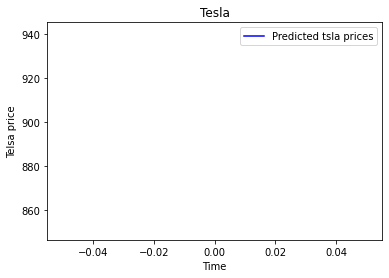

In [43]:
plt.plot(Predicted_stock_prices, color = 'blue', label = 'Predicted tsla prices')
plt.title('Tesla')
plt.xlabel('Time')
plt.ylabel('Telsa price')
plt.legend()